<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis multivariado

In [359]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

from scipy.stats import ttest_ind, shapiro, mannwhitneyu, chi2_contingency
from statsmodels.stats.weightstats import ztest as ztest
from wordcloud import WordCloud, STOPWORDS
import folium 

In [360]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Loading the data

In [361]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("./milan_listings_clean.csv")

In [362]:
# Showing dataframe dimensions
listings_df.shape

(22148, 80)

## 2. Bivariate analysis

In [363]:
# Random sample to visualize
q1 = listings_df["price"].quantile(0.25)
q3 = listings_df["price"].quantile(0.75)
iqr = q3 - q1
listings_sample_df =  listings_df.loc[listings_df["price"] <= (q3 + 5 * iqr)]#.sample(frac=0.5)
listings_sample_df.shape

(21599, 80)

In [364]:
listings_df['price_accommodates']=listings_df['price']/listings_df['accommodates']

### 2.1 Price vs scores_rating

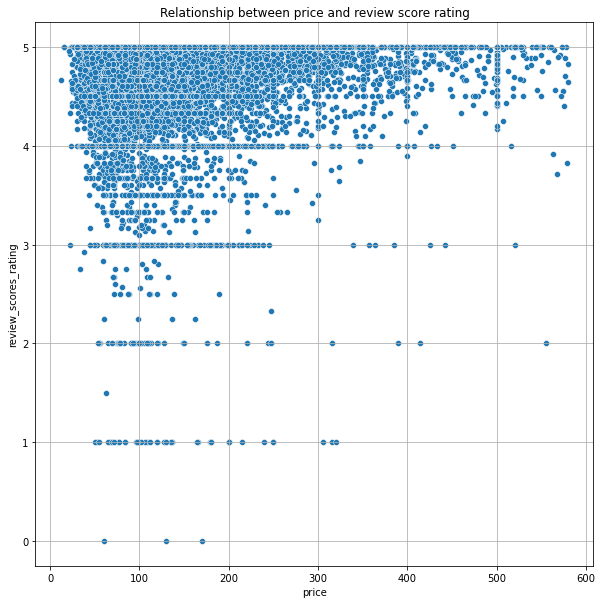

In [365]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 10))
sns.scatterplot(
    # x=listings_df["price"],
    # y=listings_df["review_scores_rating"]
    x=listings_sample_df["price"],
    y=listings_sample_df["review_scores_rating"]
)
plt.title("Relationship between price and review score rating")
plt.grid()
plt.show()

In [366]:
listings_df[['price',"review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr()

,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
price,1.000000,-0.008498,-0.015183,-0.002404,-0.022067,-0.009936,0.036899,0.002528
review_scores_rating,-0.008498,1.000000,0.833543,0.765886,0.715455,0.754727,0.531073,0.836300
review_scores_accuracy,-0.015183,0.833543,1.000000,0.718512,0.655159,0.700135,0.506054,0.790064
review_scores_cleanliness,-0.002404,0.765886,0.718512,1.000000,0.569976,0.579434,0.457037,0.714742
review_scores_checkin,-0.022067,0.715455,0.655159,0.569976,1.000000,0.739544,0.433947,0.645237
review_scores_communication,-0.009936,0.754727,0.700135,0.579434,0.739544,1.000000,0.437962,0.683223
review_scores_location,0.036899,0.531073,0.506054,0.457037,0.433947,0.437962,1.000000,0.539167
review_scores_value,0.002528,0.836300,0.790064,0.714742,0.645237,0.683223,0.539167,1.000000


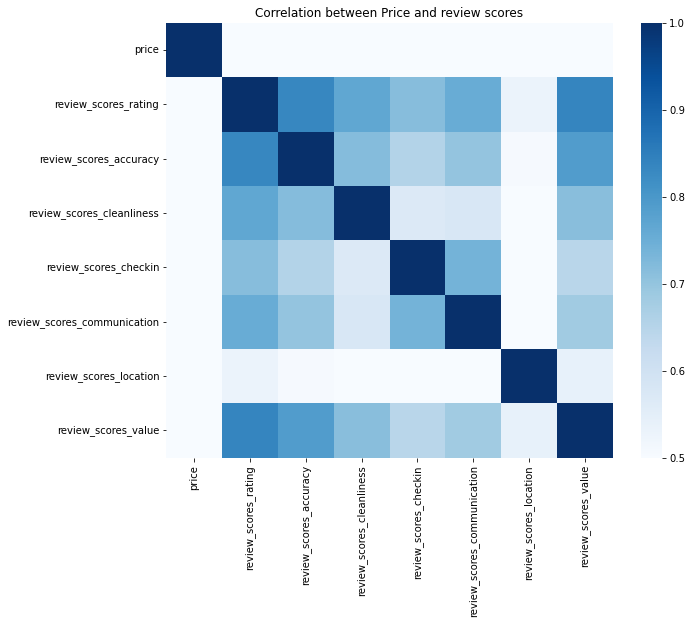

In [367]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[['price',"review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation between Price and review scores")
plt.show()

In [368]:
listings_df[['price',"review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr('spearman')

,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
price,1.000000,0.104030,0.099111,0.126297,0.070742,0.071513,0.272649,0.090517
review_scores_rating,0.104030,1.000000,0.766840,0.721881,0.655391,0.681186,0.456410,0.754952
review_scores_accuracy,0.099111,0.766840,1.000000,0.677991,0.611082,0.645515,0.426592,0.691234
review_scores_cleanliness,0.126297,0.721881,0.677991,1.000000,0.544176,0.568278,0.391834,0.634582
review_scores_checkin,0.070742,0.655391,0.611082,0.544176,1.000000,0.699604,0.394312,0.563217
review_scores_communication,0.071513,0.681186,0.645515,0.568278,0.699604,1.000000,0.390202,0.596038
review_scores_location,0.272649,0.456410,0.426592,0.391834,0.394312,0.390202,1.000000,0.461330
review_scores_value,0.090517,0.754952,0.691234,0.634582,0.563217,0.596038,0.461330,1.000000


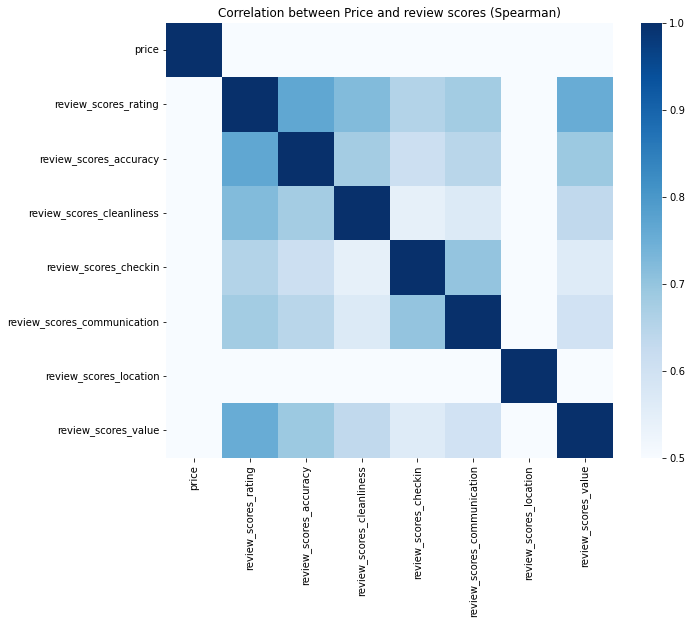

In [369]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[['price',"review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr('spearman'),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation between Price and review scores (Spearman)")
plt.show()

<span style="color: Lightgreen;">No hay relación entre el score rating y el precio de una propiedad.</span>

In [370]:
listings_df[['price',"review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr()['review_scores_rating'].sort_values(ascending=False)

review_scores_rating           1.000000
review_scores_value            0.836300
review_scores_accuracy         0.833543
review_scores_cleanliness      0.765886
review_scores_communication    0.754727
review_scores_checkin          0.715455
review_scores_location         0.531073
price                         -0.008498
Name: review_scores_rating, dtype: float64

<span style="color: Lightgreen;"> Dentro de los scores los que más tienen correlación con el general es el de valor y el de exactitud</span>

### 2.2 Price vs Neighbourhood_cleansed

In [371]:
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


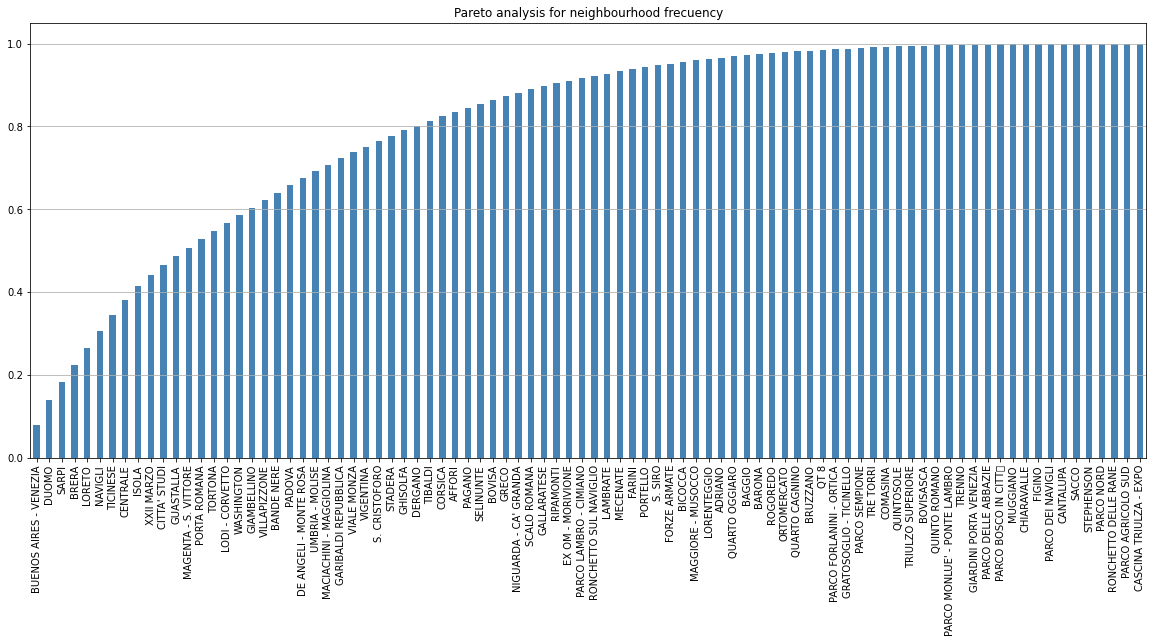

In [372]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [373]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
x=listings_sample_df[listings_sample_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)].groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending=False).head(5)
top_mean_price=x.index.tolist()
x

neighbourhood_cleansed
DUOMO                   214.242665
BRERA                   202.635754
GUASTALLA               176.074153
GARIBALDI REPUBBLICA    164.070122
MAGENTA - S. VITTORE    153.249458
Name: price, dtype: float64

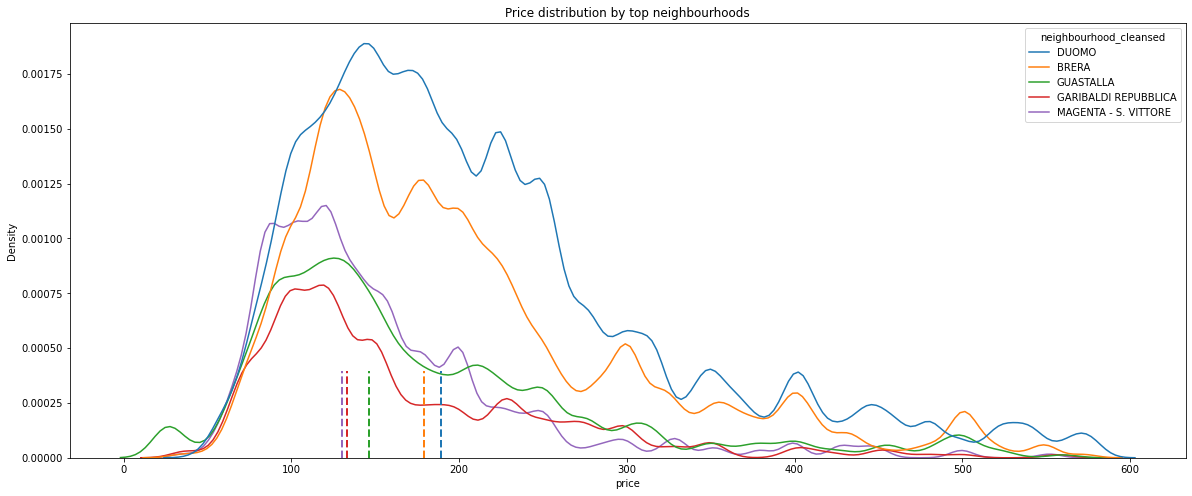

In [374]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_sample_df.loc[listings_sample_df["neighbourhood_cleansed"].isin(top_mean_price)],
    x="price",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax, hue_order=top_mean_price
)
for (neighbourhood, color) in zip(top_mean_price, sns.color_palette("tab10")):
    ax.axvline(listings_sample_df.loc[listings_sample_df["neighbourhood_cleansed"] == neighbourhood, "price"].quantile(.5), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by top neighbourhoods")
plt.show()

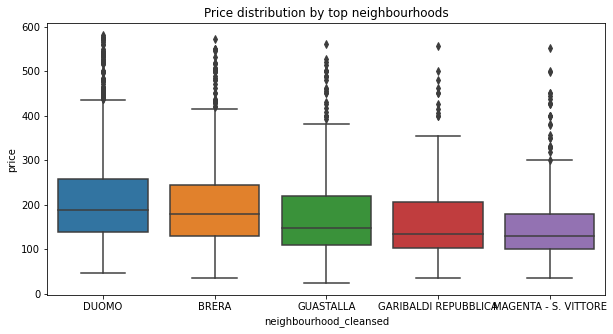

In [375]:
x=listings_sample_df[listings_sample_df["neighbourhood_cleansed"].isin(top_mean_price)].copy()
plt.figure(figsize = (10, 5))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=x, order=top_mean_price)
plt.title("Price distribution by top neighbourhoods")
plt.show()

In [376]:
#Pruebas entre neighbourhoods
# Testing normality for each group, ninguno tiene distribución normal por lo que hay que usar el test de mannwhitneyu
top1=listings_sample_df[listings_sample_df["neighbourhood_cleansed"] == top_mean_price[0]]["price"]
top2=listings_sample_df[listings_sample_df["neighbourhood_cleansed"] == top_mean_price[1]]["price"]
top3=listings_sample_df[listings_sample_df["neighbourhood_cleansed"] == top_mean_price[2]]["price"]
top4=listings_sample_df[listings_sample_df["neighbourhood_cleansed"] == top_mean_price[3]]["price"]

print(f"{top_mean_price[0]}:", shapiro(top1)[1])
print(f"{top_mean_price[1]}:", shapiro(top2)[1])
print(f"{top_mean_price[2]}:", shapiro(top3)[1])
print(f"{top_mean_price[3]}:", shapiro(top4)[1],f"\n")

#test mannwhitneyu
print(top_mean_price[0],'vs',top_mean_price[1]+',','pvalue:',mannwhitneyu(top1,top2)[1])
print(top_mean_price[1],'vs',top_mean_price[2]+',','pvalue:',mannwhitneyu(top2,top3)[1])
print(top_mean_price[2],'vs',top_mean_price[3]+',','pvalue:',mannwhitneyu(top3,top4)[1])

DUOMO: 2.290338808431639e-27
BRERA: 2.5359115117534993e-24
GUASTALLA: 2.8069451263616115e-19
GARIBALDI REPUBBLICA: 2.75738049921261e-16 

DUOMO vs BRERA, pvalue: 0.00395874400392079
BRERA vs GUASTALLA, pvalue: 6.426002091767088e-09
GUASTALLA vs GARIBALDI REPUBBLICA, pvalue: 0.13202393165708742


<span style="color: LightGreen;">Con un nivel de significancia del 5% se puede negar la hipotesis nula para los 3 primeros barrios y concluir que su precio promedio es diferente. Siendo el mejor barrio el Duomo.</span>

In [377]:
# x=listings_sample_df[['latitude','longitude','price']].copy()
x=listings_sample_df[listings_sample_df['neighbourhood_cleansed'].isin(['DUOMO','BRERA'])][['latitude','longitude','price']].copy()
norm_price=(x['price']-x['price'].min())*10/(x['price'].max()-x['price'].min())

map = folium.Map(location=[45.4693, 9.1876], zoom_start=15)
for loc, p in zip(zip(x['latitude'],x['longitude']),norm_price):
    folium.CircleMarker(location=loc,radius=p, fill=True).add_to(map)
map

In [378]:
x=listings_sample_df[listings_sample_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)].groupby(['neighbourhood_cleansed'])['reviews_per_month'].mean().sort_values(ascending=False).head(5)
top_mean_reviews=x.index.tolist()
x

neighbourhood_cleansed
CENTRALE                   2.800675
DUOMO                      2.147780
LORETO                     2.141358
MACIACHINI - MAGGIOLINA    2.064947
GARIBALDI REPUBBLICA       1.977266
Name: reviews_per_month, dtype: float64

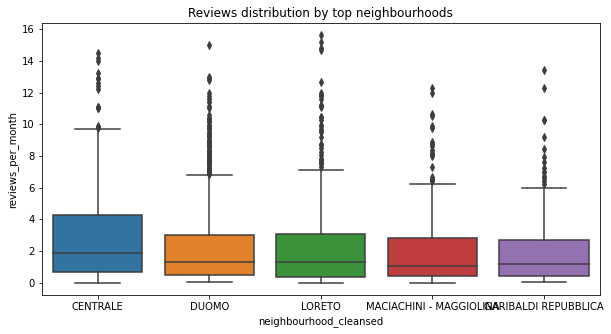

In [379]:
plt.figure(figsize = (10, 5))
sns.boxplot(x='neighbourhood_cleansed', y='reviews_per_month', data=listings_sample_df[listings_sample_df["neighbourhood_cleansed"].isin(top_mean_reviews)], order=top_mean_reviews)
plt.title("Reviews distribution by top neighbourhoods")
plt.show()

### 2.3 Price vs Accommodates

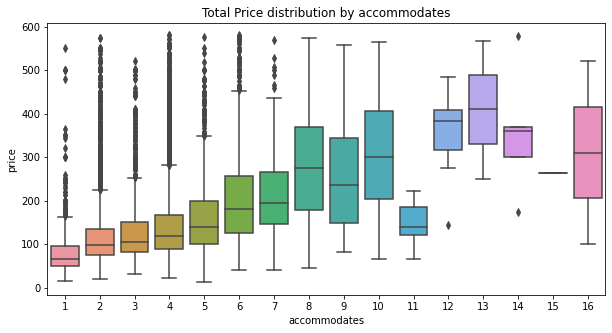

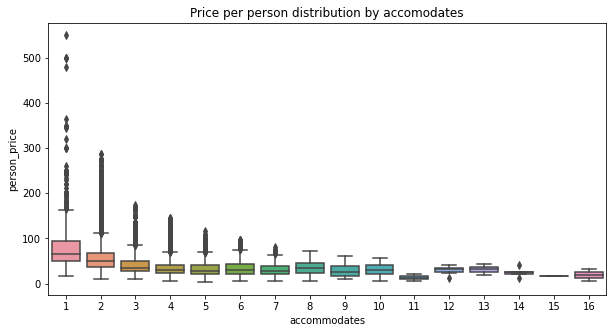

In [380]:
# x=listings_df[['accommodates','price']].copy()
x=listings_sample_df[['accommodates','price']].copy()
x['person_price']=x['price']/x['accommodates']

plt.figure(figsize = (10, 5))
sns.boxplot(x='accommodates', y='price', data=x)
plt.title("Total Price distribution by accommodates")
plt.show()

plt.figure(figsize = (10, 5))
sns.boxplot(x='accommodates', y='person_price', data=x)
plt.title("Price per person distribution by accomodates")
plt.show()

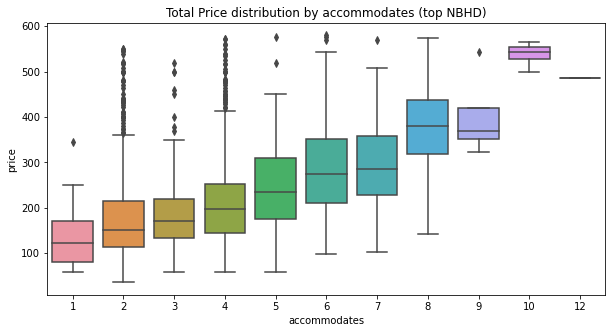

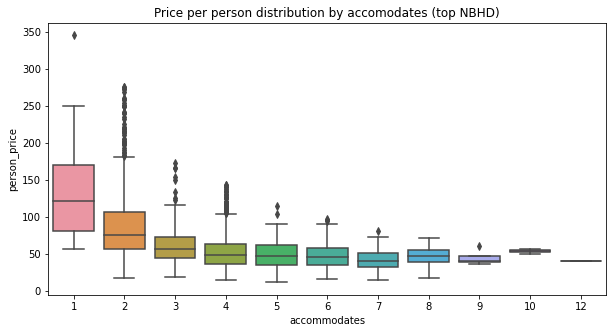

In [381]:
# 
x=listings_sample_df[listings_sample_df['neighbourhood_cleansed'].isin(['DUOMO','BRERA'])][['accommodates','price']].copy()
x['person_price']=x['price']/x['accommodates']

plt.figure(figsize = (10, 5))
sns.boxplot(x='accommodates', y='price', data=x)
plt.title("Total Price distribution by accommodates (top NBHD)")
plt.show()

plt.figure(figsize = (10, 5))
sns.boxplot(x='accommodates', y='person_price', data=x)
plt.title("Price per person distribution by accomodates (top NBHD)")
plt.show()

<span style="color: LightGreen;">Las propiedades con mayor capacidad tienen mayor precio, sin embargo, el precio por persona disminuye de acuerdo a la capacidad de la propiedad.</span>

### 2.4 Price vs Bathrooms

C:\Users\User\AppData\Local\Temp\ipykernel_7564\1884064277.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x=listings_sample_df[listings_df['neighbourhood_cleansed'].isin(['DUOMO','BRERA'])].copy()


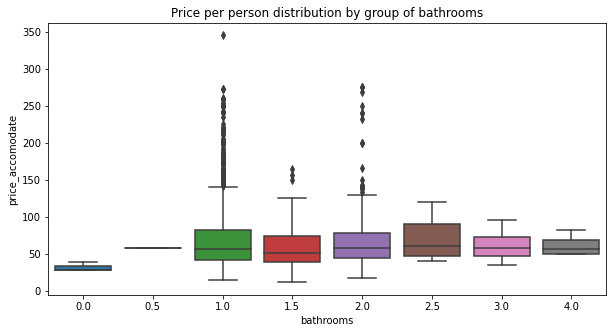

In [382]:
x=listings_sample_df[listings_df['neighbourhood_cleansed'].isin(['DUOMO','BRERA'])].copy()
x['price_accomodate']=x['price']/x['accommodates']
plt.figure(figsize = (10, 5))
sns.boxplot(x='bathrooms', y='price_accomodate', data=x)
plt.title("Price per person distribution by group of bathrooms")
plt.show()

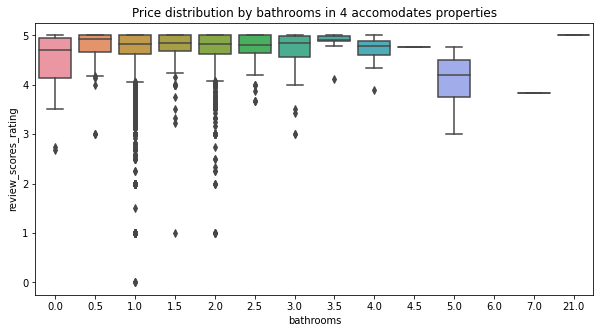

In [383]:
x=listings_sample_df.copy()
plt.figure(figsize = (10, 5))
sns.boxplot(x='bathrooms', y='review_scores_rating', data=x)
plt.title("Price distribution by bathrooms in 4 accomodates properties")
plt.show()

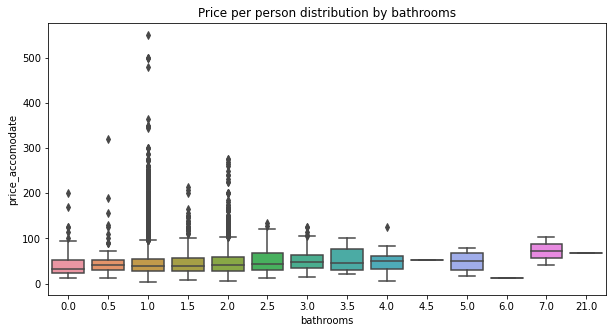

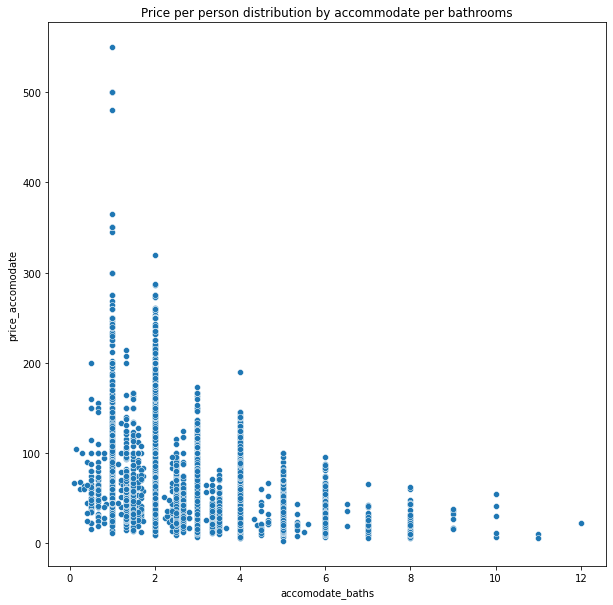

In [384]:
x=listings_sample_df.copy()
x['price_accomodate']=x['price']/x['accommodates']
x['accomodate_baths']=x['accommodates']/x['bathrooms']
plt.figure(figsize = (10, 5))
sns.boxplot(x='bathrooms', y='price_accomodate', data=x)
plt.title("Price per person distribution by bathrooms")
plt.show()

plt.figure(figsize = (10, 10))
sns.scatterplot(x='accomodate_baths', y='price_accomodate', data=x)
plt.title("Price per person distribution by accommodate per bathrooms")
plt.show()


### 2.5 Host

In [385]:
listings_df[['review_scores_rating','host_since_days']].corr('spearman')

,review_scores_rating,host_since_days
review_scores_rating,1.000000,-0.063184
host_since_days,-0.063184,1.000000


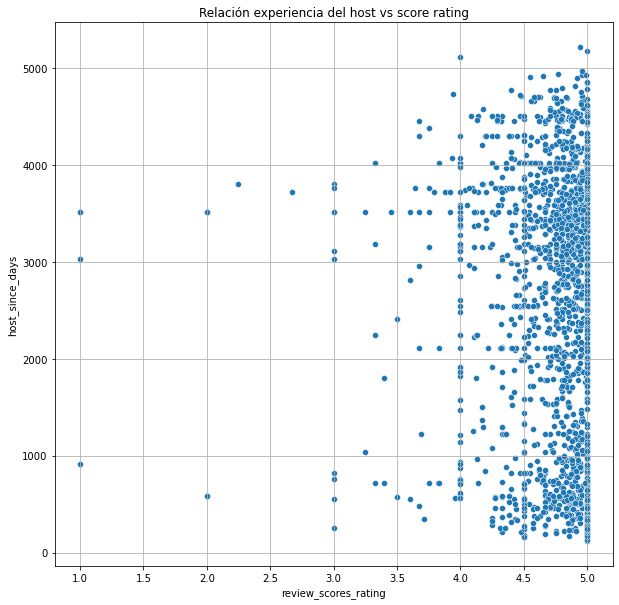

In [386]:
x=listings_sample_df.sample(frac=0.1).copy()
# x=listings_sample_df[listings_sample_df['neighbourhood_cleansed'].isin(['DUOMO','BRERA'])].copy()
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 10))
sns.scatterplot(
    # x=listings_df["price"],
    # y=listings_df["review_scores_rating"]
    x=x["review_scores_rating"],
    y=x["host_since_days"]
)
plt.title("Relación experiencia del host vs score rating")
plt.title("Relación experiencia del host vs score rating")
plt.grid()
plt.show()

<span style="color: red;">No concluyente.</span>

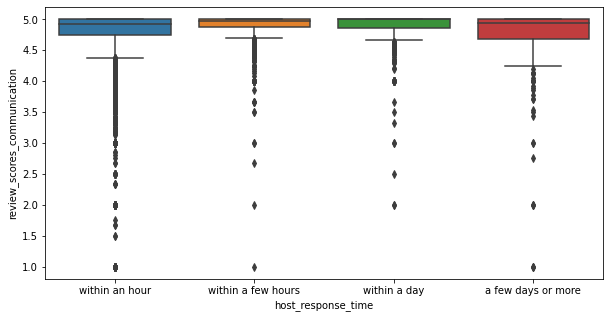

In [387]:
x=listings_sample_df.copy()
order=['within an hour','within a few hours','within a day','a few days or more']
plt.figure(figsize = (10, 5))
sns.boxplot(x='host_response_time', y='review_scores_communication', data=x, order=order)
plt.title("")
plt.show()

In [388]:
listings_df[['host_response_time','review_scores_communication']].groupby(['host_response_time']).mean()

,review_scores_communication
host_response_time,
a few days or more,4.715846
within a day,4.869157
within a few hours,4.887806
within an hour,4.783213


<span style="color: red;">No concluyente.</span>

### 2.5 Amenities

In [389]:
amenities=listings_sample_df[['listing_url','price','amenities']].copy()
amenities['str_len_amenities']=amenities['amenities'].apply(lambda x: len(x))
amenities['list_amenities']=amenities['amenities'].apply(lambda x: x.replace('"','').replace('\\u2013','-').replace("\\u2019","'")[1:-1].split(", "))
amenities['number_amenities']=amenities['list_amenities'].apply(lambda x: len(x))
# amenities['amenities'].loc[amenities['amenities'].str.contains("\u"),'amenities']

amenities[amenities['number_amenities']==amenities['number_amenities'].max()][['number_amenities','listing_url']]

,number_amenities,listing_url
14537,109,https://www.airbnb.com/rooms/952725501377744562


In [390]:
# def amenities_to_columns(x):
    # x[x['amenities'][0]]=1
    # return x

# amenities.apply(amenities_to_columns, axis=1)

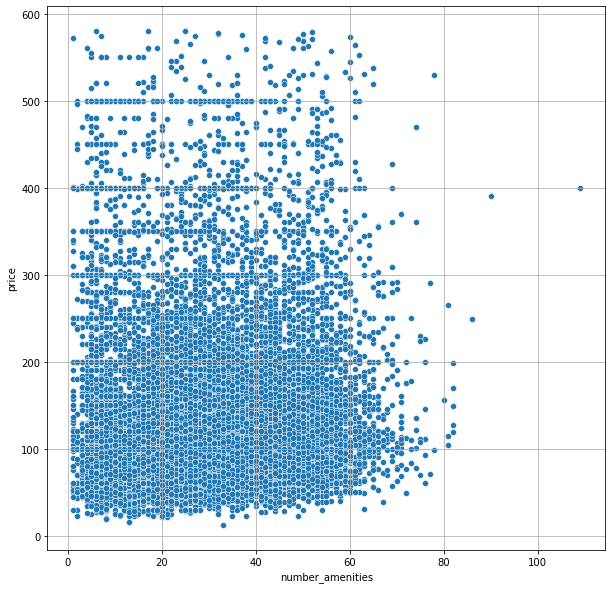

In [391]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 10))
sns.scatterplot(
    # x=listings_df["price"],
    # y=listings_df["review_scores_rating"]
    x=amenities["number_amenities"],
    y=amenities["price"]
)
plt.title("")
plt.grid()
plt.show()

In [392]:
amenities[['number_amenities','price']].corr('spearman')

,number_amenities,price
number_amenities,1.000000,0.035165
price,0.035165,1.000000


In [393]:
list_amenities=amenities["list_amenities"].explode().unique().tolist()
len(list_amenities)

3756

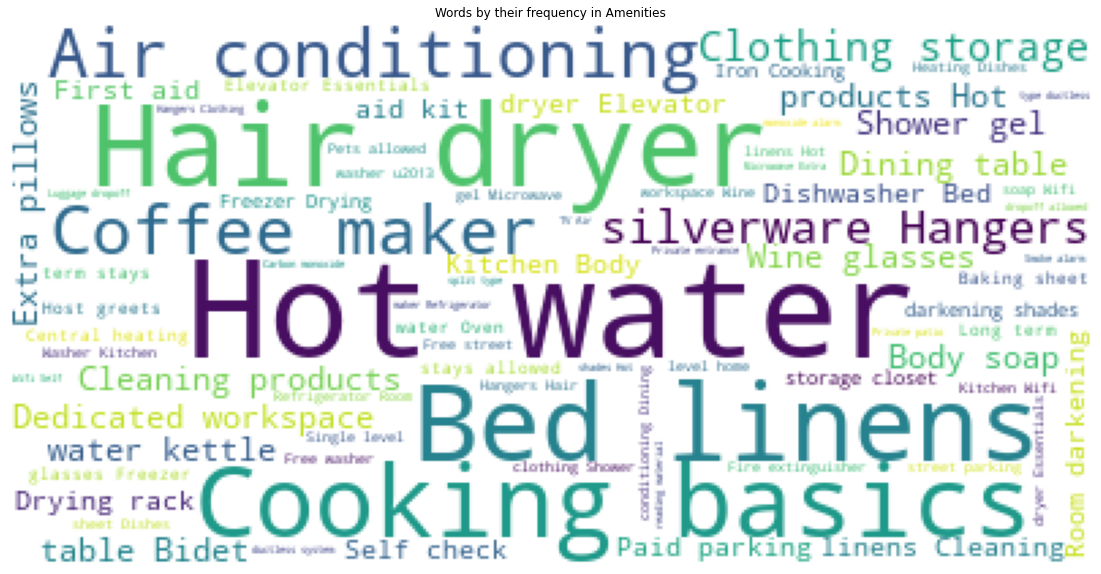

In [394]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(amenities['amenities']))
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.title('Words by their frequency in Amenities')
plt.axis('off')
plt.show()

In [395]:
words = wordcloud.process_text(' '.join(amenities['amenities']))
sorted_words = sorted(words.items(), key=lambda x: x[1])
sorted_words.reverse()
sorted_words[:5]

[('Hot water', 26769),
 ('Hair dryer', 18550),
 ('Bed linens', 15973),
 ('Cooking basics', 14635),
 ('Air conditioning', 14396)]

#### Hot water


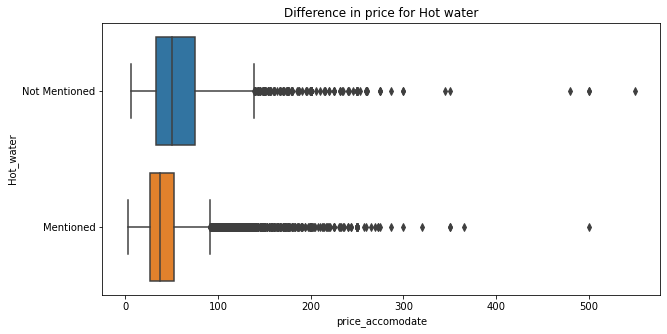

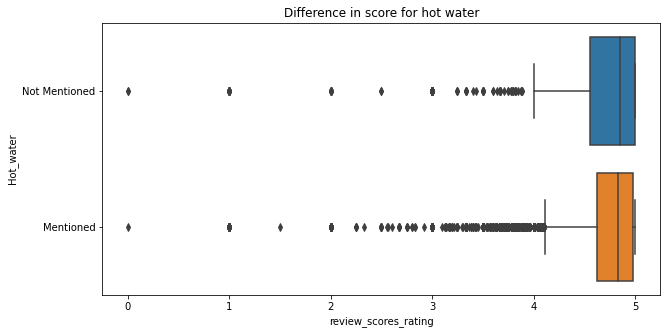

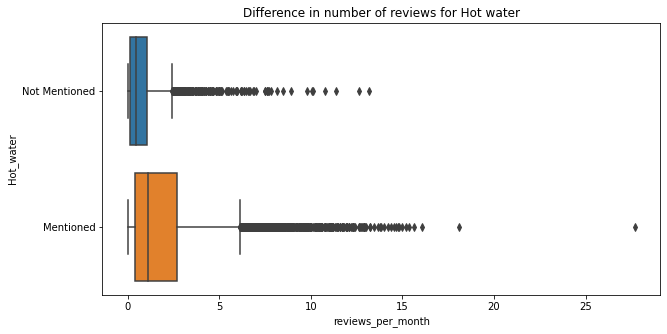

In [396]:
x=listings_sample_df.copy()
x['price_accomodate']=x['price']/x['accommodates']
x['Hot_water']= x['amenities'].apply(lambda x: 'Mentioned' if 'Hot water' in x else 'Not Mentioned')
plt.figure(figsize = (10, 5))
sns.boxplot(x='price_accomodate', y='Hot_water', data=x)
plt.title("Difference in price for Hot water")
plt.show()

plt.figure(figsize = (10, 5))
sns.boxplot(x='review_scores_rating', y='Hot_water', data=x)
plt.title("Difference in score for hot water")
plt.show()

plt.figure(figsize = (10, 5))
sns.boxplot(x='reviews_per_month', y='Hot_water', data=x)
plt.title("Difference in number of reviews for Hot water")
plt.show()

In [397]:
Mentioned=x[x["Hot_water"] == 'Mentioned']
NotMentioned=x[x["Hot_water"] == 'Not Mentioned']

print('review_scores_rating | Mentioned mean:',Mentioned['review_scores_rating'].mean())
print('review_scores_rating | Not mentioned mean:',NotMentioned['review_scores_rating'].mean(),'\n')

print('review_scores_rating | Hot_water mentioned normality', shapiro(Mentioned['review_scores_rating'])[1])
print('review_scores_rating | Hot_water not mentioned normality', shapiro(NotMentioned['review_scores_rating'])[1],'\n')

#z test with normality
print('review_scores_rating | Mentioned vs Not mentioned | z-test pvalue:', ztest(Mentioned[Mentioned['review_scores_rating'].isna()==False]['review_scores_rating'],NotMentioned[NotMentioned['review_scores_rating'].isna()==False]['review_scores_rating'])[1],'\n')

print('reviews_per_month | Mentioned mean:',Mentioned['reviews_per_month'].mean())
print('reviews_per_month | Not mentioned mean:',NotMentioned['reviews_per_month'].mean(),'\n')

print('reviews_per_month | Hot_water mentioned normality', shapiro(Mentioned['reviews_per_month'])[1])
print('reviews_per_month | Hot_water not mentioned normality', shapiro(NotMentioned['reviews_per_month'])[1],'\n')

#Z test
print('reviews_per_month | Mentioned vs Not mentioned | z-test pvalue:', ztest(Mentioned[Mentioned['reviews_per_month'].isna()==False]['reviews_per_month'],NotMentioned[NotMentioned['reviews_per_month'].isna()==False]['reviews_per_month'])[1])

#test mannwhitneyu
# print('Mentioned vs Not mentioned review_scores_rating | mannwhitneyu test pvalue:',mannwhitneyu(Mentioned[Mentioned['review_scores_rating'].isna()==False]['review_scores_rating'],NotMentioned[NotMentioned['review_scores_rating'].isna()==False]['review_scores_rating'])[1])

review_scores_rating | Mentioned mean: 4.715288085027037
review_scores_rating | Not mentioned mean: 4.674692962796952 

review_scores_rating | Hot_water mentioned normality 1.0
review_scores_rating | Hot_water not mentioned normality 1.0 

review_scores_rating | Mentioned vs Not mentioned | z-test pvalue: 1.8973257089978093e-05 

reviews_per_month | Mentioned mean: 1.9143371247436136
reviews_per_month | Not mentioned mean: 0.9142088749439713 

reviews_per_month | Hot_water mentioned normality 1.0
reviews_per_month | Hot_water not mentioned normality 1.0 

reviews_per_month | Mentioned vs Not mentioned | z-test pvalue: 1.5074929954708772e-106


d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Hair dryer

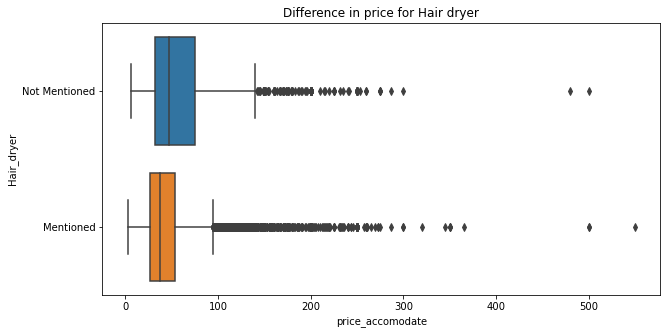

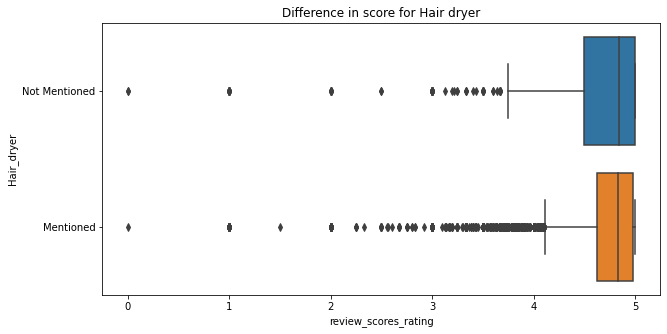

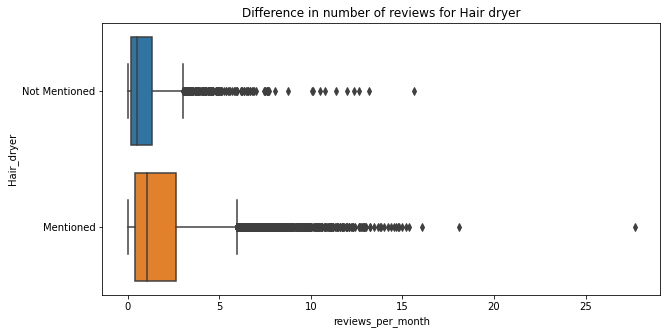

In [398]:
x=listings_sample_df.copy()
x['price_accomodate']=x['price']/x['accommodates']
x['Hair_dryer']= x['amenities'].apply(lambda x: 'Mentioned' if 'Hair dryer' in x else 'Not Mentioned')
plt.figure(figsize = (10, 5))
sns.boxplot(x='price_accomodate', y='Hair_dryer', data=x)
plt.title("Difference in price for Hair dryer")
plt.show()

plt.figure(figsize = (10, 5))
sns.boxplot(x='review_scores_rating', y='Hair_dryer', data=x)
plt.title("Difference in score for Hair dryer")
plt.show()

plt.figure(figsize = (10, 5))
sns.boxplot(x='reviews_per_month', y='Hair_dryer', data=x)
plt.title("Difference in number of reviews for Hair dryer")
plt.show()

In [399]:
Mentioned=x[x["Hair_dryer"] == 'Mentioned']
NotMentioned=x[x["Hair_dryer"] == 'Not Mentioned']

print('review_scores_rating | Mentioned mean:',Mentioned['review_scores_rating'].mean())
print('review_scores_rating | Not mentioned mean:',NotMentioned['review_scores_rating'].mean(),'\n')

print('review_scores_rating | Hair_dryer mentioned normality', shapiro(Mentioned['review_scores_rating'])[1])
print('review_scores_rating | Hair_dryer not mentioned normality', shapiro(NotMentioned['review_scores_rating'])[1],'\n')

#Ztest
print('review_scores_rating | Mentioned vs Not mentioned | z-test pvalue:', ztest(Mentioned[Mentioned['review_scores_rating'].isna()==False]['review_scores_rating'],NotMentioned[NotMentioned['review_scores_rating'].isna()==False]['review_scores_rating'])[1],'\n')

print('reviews_per_month | Mentioned mean:',Mentioned['reviews_per_month'].mean())
print('reviews_per_month | Not mentioned mean:',NotMentioned['reviews_per_month'].mean(),'\n')

print('reviews_per_month | Hair_dryer mentioned normality', shapiro(Mentioned['reviews_per_month'])[1])
print('reviews_per_month | Hair_dryer not mentioned normality', shapiro(NotMentioned['reviews_per_month'])[1],'\n')

#Ztest
print('reviews_per_month | Mentioned vs Not mentioned | z-test pvalue:', ztest(Mentioned[Mentioned['reviews_per_month'].isna()==False]['reviews_per_month'],NotMentioned[NotMentioned['reviews_per_month'].isna()==False]['reviews_per_month'])[1])

#test mannwhitneyu
# print('Mentioned vs Not mentioned review_scores_rating | mannwhitneyu test pvalue:',mannwhitneyu(Mentioned[Mentioned['review_scores_rating'].isna()==False]['review_scores_rating'],NotMentioned[NotMentioned['review_scores_rating'].isna()==False]['review_scores_rating'])[1])

review_scores_rating | Mentioned mean: 4.715290928803758
review_scores_rating | Not mentioned mean: 4.6625436554132715 

review_scores_rating | Hair_dryer mentioned normality 1.0
review_scores_rating | Hair_dryer not mentioned normality 1.0 

review_scores_rating | Mentioned vs Not mentioned | z-test pvalue: 7.259789756136043e-07 

reviews_per_month | Mentioned mean: 1.8626045054812672
reviews_per_month | Not mentioned mean: 1.115488940628638 

reviews_per_month | Hair_dryer mentioned normality 1.0
reviews_per_month | Hair_dryer not mentioned normality 1.0 

reviews_per_month | Mentioned vs Not mentioned | z-test pvalue: 1.3169865698189536e-47


d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Bed linens

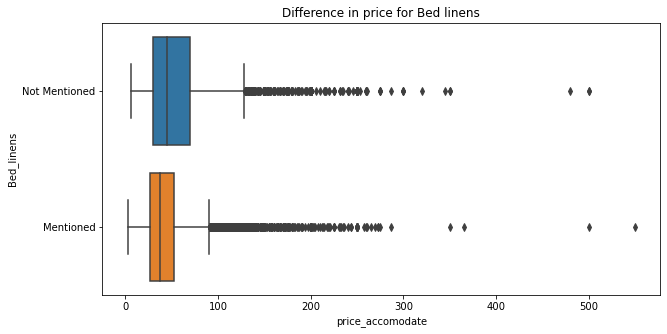

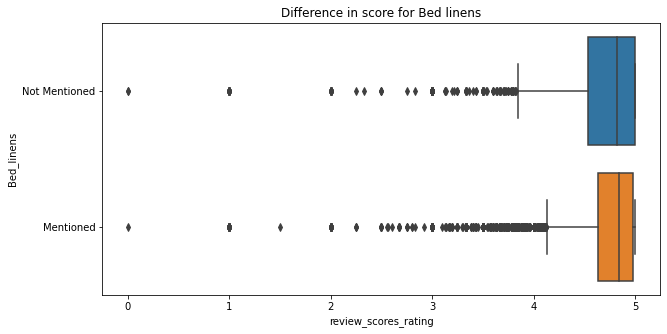

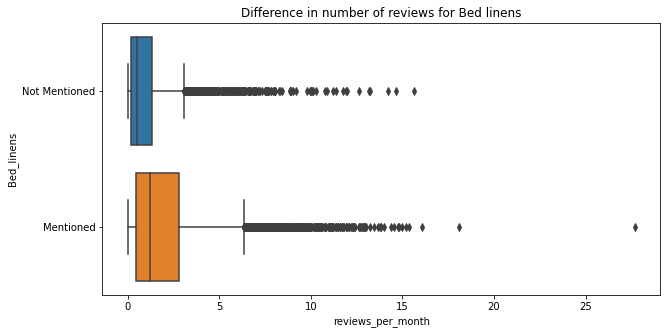

In [400]:
x=listings_sample_df.copy()
x['price_accomodate']=x['price']/x['accommodates']
x['Bed_linens']= x['amenities'].apply(lambda x: 'Mentioned' if 'Bed linens' in x else 'Not Mentioned')
plt.figure(figsize = (10, 5))
sns.boxplot(x='price_accomodate', y='Bed_linens', data=x)
plt.title("Difference in price for Bed linens")
plt.show()

plt.figure(figsize = (10, 5))
sns.boxplot(x='review_scores_rating', y='Bed_linens', data=x)
plt.title("Difference in score for Bed linens")
plt.show()

plt.figure(figsize = (10, 5))
sns.boxplot(x='reviews_per_month', y='Bed_linens', data=x)
plt.title("Difference in number of reviews for Bed linens")
plt.show()

In [401]:
Mentioned=x[x["Bed_linens"] == 'Mentioned']
NotMentioned=x[x["Bed_linens"] == 'Not Mentioned']

print('review_scores_rating | Mentioned mean:',Mentioned['review_scores_rating'].mean())
print('review_scores_rating | Not mentioned mean:',NotMentioned['review_scores_rating'].mean(),'\n')

print('review_scores_rating | Bed_linens mentioned normality', shapiro(Mentioned['review_scores_rating'])[1])
print('review_scores_rating | Bed_linens not mentioned normality', shapiro(NotMentioned['review_scores_rating'])[1],'\n')

#Ztest
print('review_scores_rating | Mentioned vs Not mentioned | z-test pvalue:', ztest(Mentioned[Mentioned['review_scores_rating'].isna()==False]['review_scores_rating'],NotMentioned[NotMentioned['review_scores_rating'].isna()==False]['review_scores_rating'])[1],'\n')

print('reviews_per_month | Mentioned mean:',Mentioned['reviews_per_month'].mean())
print('reviews_per_month | Not mentioned mean:',NotMentioned['reviews_per_month'].mean(),'\n')

print('reviews_per_month | Bed_linens mentioned normality', shapiro(Mentioned['reviews_per_month'])[1])
print('reviews_per_month | Bed_linens not mentioned normality', shapiro(NotMentioned['reviews_per_month'])[1],'\n')

#Ztest
print('reviews_per_month | Mentioned vs Not mentioned | z-test pvalue:', ztest(Mentioned[Mentioned['reviews_per_month'].isna()==False]['reviews_per_month'],NotMentioned[NotMentioned['reviews_per_month'].isna()==False]['reviews_per_month'])[1])

#test mannwhitneyu
# print('Mentioned vs Not mentioned review_scores_rating | mannwhitneyu test pvalue:',mannwhitneyu(Mentioned[Mentioned['review_scores_rating'].isna()==False]['review_scores_rating'],NotMentioned[NotMentioned['review_scores_rating'].isna()==False]['review_scores_rating'])[1])

review_scores_rating | Mentioned mean: 4.7211317086718045
review_scores_rating | Not mentioned mean: 4.670679091141179 

review_scores_rating | Bed_linens mentioned normality 1.0
review_scores_rating | Bed_linens not mentioned normality 1.0 

review_scores_rating | Mentioned vs Not mentioned | z-test pvalue: 2.5887939952560595e-11 

reviews_per_month | Mentioned mean: 1.9753822120391584
reviews_per_month | Not mentioned mean: 1.1202297676793467 

reviews_per_month | Bed_linens mentioned normality 1.0
reviews_per_month | Bed_linens not mentioned normality 1.0 

reviews_per_month | Mentioned vs Not mentioned | z-test pvalue: 1.3003852426562473e-122


d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Cooking basics

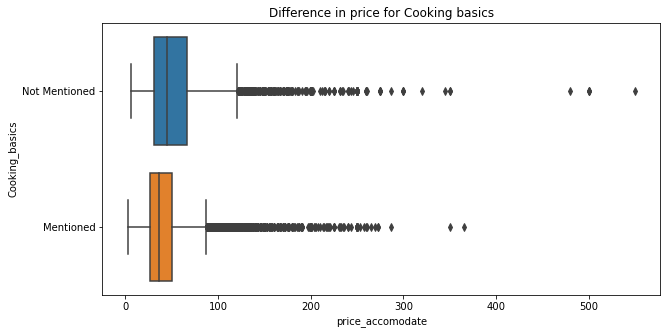

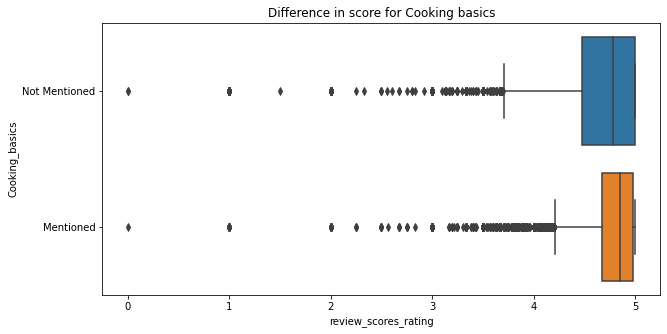

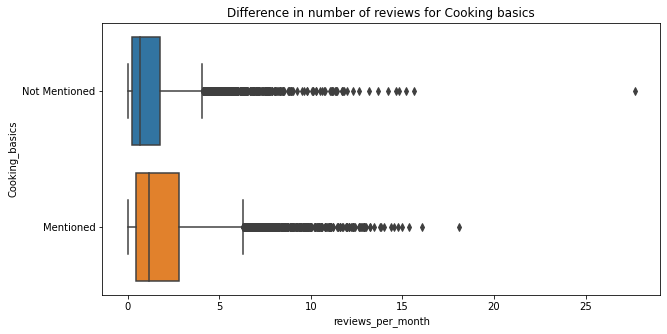

In [402]:
x=listings_sample_df.copy()
x['price_accomodate']=x['price']/x['accommodates']
x['Cooking_basics']= x['amenities'].apply(lambda x: 'Mentioned' if 'Cooking basics' in x else 'Not Mentioned')
plt.figure(figsize = (10, 5))
sns.boxplot(x='price_accomodate', y='Cooking_basics', data=x)
plt.title("Difference in price for Cooking basics")
plt.show()

plt.figure(figsize = (10, 5))
sns.boxplot(x='review_scores_rating', y='Cooking_basics', data=x)
plt.title("Difference in score for Cooking basics")
plt.show()

plt.figure(figsize = (10, 5))
sns.boxplot(x='reviews_per_month', y='Cooking_basics', data=x)
plt.title("Difference in number of reviews for Cooking basics")
plt.show()

In [403]:
Mentioned=x[x["Cooking_basics"] == 'Mentioned']
NotMentioned=x[x["Cooking_basics"] == 'Not Mentioned']

print('review_scores_rating | Mentioned mean:',Mentioned['review_scores_rating'].mean())
print('review_scores_rating | Not mentioned mean:',NotMentioned['review_scores_rating'].mean(),'\n')

print('review_scores_rating | Cooking_basics mentioned normality', shapiro(Mentioned['review_scores_rating'])[1])
print('review_scores_rating | Cooking_basics not mentioned normality', shapiro(NotMentioned['review_scores_rating'])[1],'\n')

#Ztest
print('review_scores_rating | Mentioned vs Not mentioned | z-test pvalue:', ztest(Mentioned[Mentioned['review_scores_rating'].isna()==False]['review_scores_rating'],NotMentioned[NotMentioned['review_scores_rating'].isna()==False]['review_scores_rating'])[1],'\n')

print('reviews_per_month | Mentioned mean:',Mentioned['reviews_per_month'].mean())
print('reviews_per_month | Not mentioned mean:',NotMentioned['reviews_per_month'].mean(),'\n')

print('reviews_per_month | Cooking_basics mentioned normality', shapiro(Mentioned['reviews_per_month'])[1])
print('reviews_per_month | Cooking_basics not mentioned normality', shapiro(NotMentioned['reviews_per_month'])[1],'\n')

#Ztest
print('reviews_per_month | Mentioned vs Not mentioned | z-test pvalue:', ztest(Mentioned[Mentioned['reviews_per_month'].isna()==False]['reviews_per_month'],NotMentioned[NotMentioned['reviews_per_month'].isna()==False]['reviews_per_month'])[1])

#test mannwhitneyu
# print('Mentioned vs Not mentioned review_scores_rating | mannwhitneyu test pvalue:',mannwhitneyu(Mentioned[Mentioned['review_scores_rating'].isna()==False]['review_scores_rating'],NotMentioned[NotMentioned['review_scores_rating'].isna()==False]['review_scores_rating'])[1])

review_scores_rating | Mentioned mean: 4.749610769461527
review_scores_rating | Not mentioned mean: 4.605334937825912 

review_scores_rating | Cooking_basics mentioned normality 1.0
review_scores_rating | Cooking_basics not mentioned normality 1.0 

review_scores_rating | Mentioned vs Not mentioned | z-test pvalue: 3.472662459620194e-97 

reviews_per_month | Mentioned mean: 1.9457207139643016
reviews_per_month | Not mentioned mean: 1.3828981147212192 

reviews_per_month | Cooking_basics mentioned normality 1.0
reviews_per_month | Cooking_basics not mentioned normality 1.0 

reviews_per_month | Mentioned vs Not mentioned | z-test pvalue: 1.2826107901959543e-62


d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Air conditioning

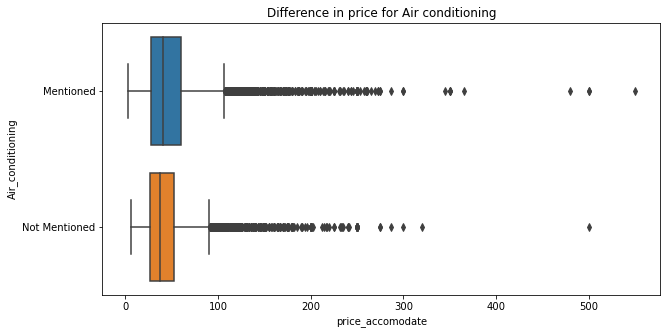

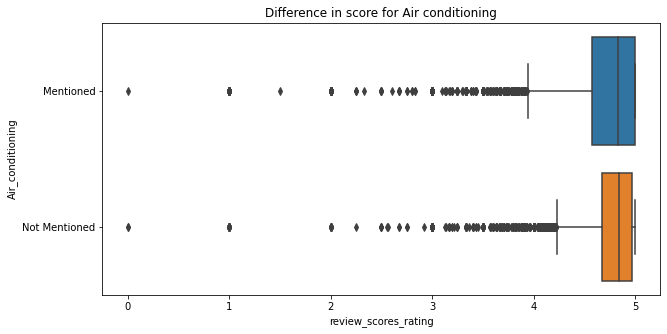

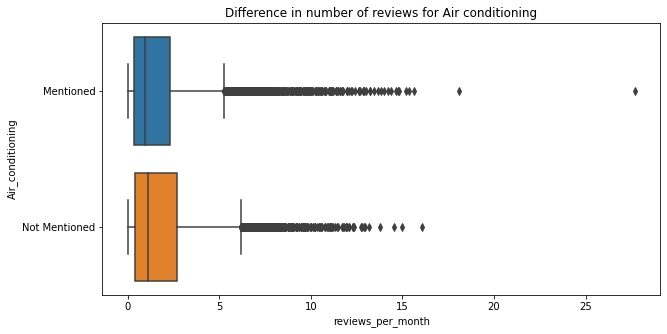

In [404]:
x=listings_sample_df.copy()
x['price_accomodate']=x['price']/x['accommodates']
x['Air_conditioning']= x['amenities'].apply(lambda x: 'Mentioned' if 'Air conditioning' in x else 'Not Mentioned')
plt.figure(figsize = (10, 5))
sns.boxplot(x='price_accomodate', y='Air_conditioning', data=x)
plt.title("Difference in price for Air conditioning")
plt.show()

plt.figure(figsize = (10, 5))
sns.boxplot(x='review_scores_rating', y='Air_conditioning', data=x)
plt.title("Difference in score for Air conditioning")
plt.show()

plt.figure(figsize = (10, 5))
sns.boxplot(x='reviews_per_month', y='Air_conditioning', data=x)
plt.title("Difference in number of reviews for Air conditioning")
plt.show()

In [405]:
Mentioned=x[x["Air_conditioning"] == 'Mentioned']
NotMentioned=x[x["Air_conditioning"] == 'Not Mentioned']

print('review_scores_rating | Mentioned mean:',Mentioned['review_scores_rating'].mean())
print('review_scores_rating | Not mentioned mean:',NotMentioned['review_scores_rating'].mean(),'\n')

print('review_scores_rating | Air_conditioning mentioned normality', shapiro(Mentioned['review_scores_rating'])[1])
print('review_scores_rating | Air_conditioning not mentioned normality', shapiro(NotMentioned['review_scores_rating'])[1],'\n')

#Ztest
print('review_scores_rating | Mentioned vs Not mentioned | z-test pvalue:', ztest(Mentioned[Mentioned['review_scores_rating'].isna()==False]['review_scores_rating'],NotMentioned[NotMentioned['review_scores_rating'].isna()==False]['review_scores_rating'])[1],'\n')

print('reviews_per_month | Mentioned mean:',Mentioned['reviews_per_month'].mean())
print('reviews_per_month | Not mentioned mean:',NotMentioned['reviews_per_month'].mean(),'\n')

print('reviews_per_month | Air_conditioning mentioned normality', shapiro(Mentioned['reviews_per_month'])[1])
print('reviews_per_month | Air_conditioning not mentioned normality', shapiro(NotMentioned['reviews_per_month'])[1],'\n')

#Ztest
print('reviews_per_month | Mentioned vs Not mentioned | z-test pvalue:', ztest(Mentioned[Mentioned['reviews_per_month'].isna()==False]['reviews_per_month'],NotMentioned[NotMentioned['reviews_per_month'].isna()==False]['reviews_per_month'])[1])

#test mannwhitneyu
# print('Mentioned vs Not mentioned review_scores_rating | mannwhitneyu test pvalue:',mannwhitneyu(Mentioned[Mentioned['review_scores_rating'].isna()==False]['review_scores_rating'],NotMentioned[NotMentioned['review_scores_rating'].isna()==False]['review_scores_rating'])[1])

review_scores_rating | Mentioned mean: 4.687499233520695
review_scores_rating | Not mentioned mean: 4.736535442296427 

review_scores_rating | Air_conditioning mentioned normality 1.0
review_scores_rating | Air_conditioning not mentioned normality 1.0 

review_scores_rating | Mentioned vs Not mentioned | z-test pvalue: 3.0409433516836606e-15 

reviews_per_month | Mentioned mean: 1.7230454777721
reviews_per_month | Not mentioned mean: 1.872216754540129 

reviews_per_month | Air_conditioning mentioned normality 1.0
reviews_per_month | Air_conditioning not mentioned normality 1.0 

reviews_per_month | Mentioned vs Not mentioned | z-test pvalue: 8.343920149522764e-07


d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Otros

In [406]:
listings_df[['number_of_reviews_ltm','price']].corr('spearman')

,number_of_reviews_ltm,price
number_of_reviews_ltm,1.000000,-0.220706
price,-0.220706,1.000000


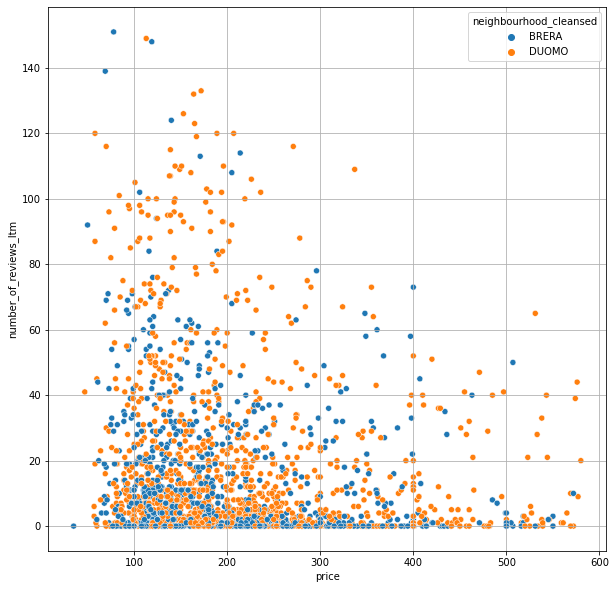

In [407]:
x=listings_sample_df[listings_sample_df['neighbourhood_cleansed'].isin(['DUOMO','BRERA'])].copy()
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 10))
sns.scatterplot(
    # x=listings_df["price"],
    # y=listings_df["review_scores_rating"]
    x=x["price"],
    y=x["number_of_reviews_ltm"],
    hue = x['neighbourhood_cleansed']
)
plt.title("")
plt.grid()
plt.show()

In [408]:
top_hosts=listings_df[['host_id','host_name','id']].groupby(['host_id','host_name']).count().reset_index().sort_values(by='id', ascending=False).head()
listings_df[listings_df['host_id'].isin(top_hosts['host_id'])]['neighbourhood_cleansed'].value_counts().head()

BUENOS AIRES - VENEZIA    144
DUOMO                     110
MAGENTA - S. VITTORE       90
LORETO                     64
CENTRALE                   59
Name: neighbourhood_cleansed, dtype: int64

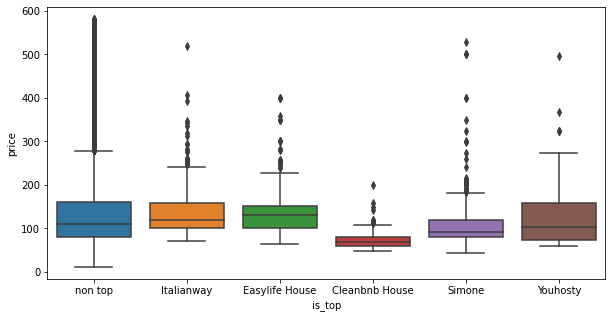

In [409]:
x=listings_sample_df[['host_name','price']].copy()
x['is_top']=x['host_name'].apply(lambda x: x if(x in top_hosts['host_name'].tolist()) else 'non top')
plt.figure(figsize = (10, 5))
sns.boxplot(x='is_top', y='price', data=x, order=['non top']+top_hosts['host_name'].tolist())
# plt.title("Price distribution by group of bathrooms")
plt.show()

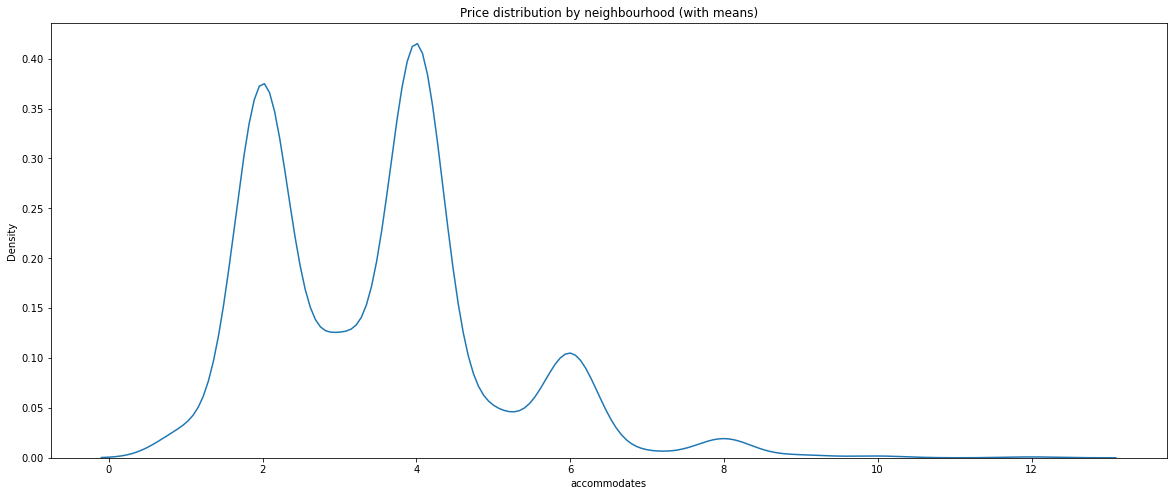

In [415]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_sample_df.loc[listings_df["neighbourhood_cleansed"]=='DUOMO'],
    x="accommodates",
    ax=ax
)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

In [416]:
listings_sample_df.loc[listings_df["neighbourhood_cleansed"]=='DUOMO']['accommodates'].value_counts(normalize=True)

4     0.377478
2     0.340999
3     0.098335
6     0.095163
5     0.037272
1     0.023791
8     0.017446
7     0.004758
9     0.002379
10    0.001586
12    0.000793
Name: accommodates, dtype: float64

## End